### 1. Load in data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("../data/merged_sp500_wsb.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df.head()

,date,close,sentiment,sentiment_ma7
0,2022-03-28,4575.52,0.096135,NaN
1,2022-03-29,4631.60,0.064216,NaN
2,2022-03-30,4602.45,0.120320,NaN
3,2022-03-31,4530.41,0.091493,NaN
4,2022-04-01,4545.86,0.059293,NaN


### 2. Calculate the daily return rate (the core variable)

In [11]:
df['return'] = df['close'].pct_change()

df = df.dropna(subset=['return', 'sentiment_ma7'])

df[['date', 'close', 'sentiment_ma7', 'return']].head()

,date,close,sentiment_ma7,return
6,2022-04-05,4525.12,0.084147,-0.012552
7,2022-04-06,4481.15,0.072923,-0.009717
8,2022-04-07,4500.21,0.074643,0.004253
9,2022-04-08,4488.28,0.067379,-0.002651
10,2022-04-11,4412.53,0.057539,-0.016877


### 3. Conduct a correlation analysis

In [12]:
corr = df[['sentiment_ma7', 'return']].corr()
corr

,sentiment_ma7,return
sentiment_ma7,1.000000,0.017827
return,0.017827,1.000000


### 4. Conduct regression analysis

In [13]:
X = df[['sentiment_ma7']]
X = sm.add_constant(X)      
y = df['return']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2368
Date:                Sun, 16 Nov 2025   Prob (F-statistic):              0.627
Time:                        20:12:25   Log-Likelihood:                 2328.0
No. Observations:                 747   AIC:                            -4652.
Df Residuals:                     745   BIC:                            -4643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0012      0.003     -0.372

### 5. Draw 1-2 diagrams (for reporting)

#### 5.1 Scatter Plot: Emotion vs. Yield Rate


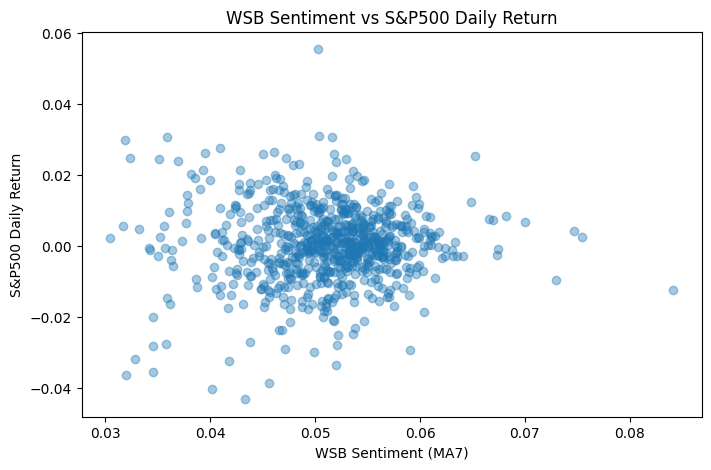

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df['sentiment_ma7'], df['return'], alpha=0.4)
plt.xlabel("WSB Sentiment (MA7)")
plt.ylabel("S&P500 Daily Return")
plt.title("WSB Sentiment vs S&P500 Daily Return")
plt.show()

### 5.2 Add a regression line 

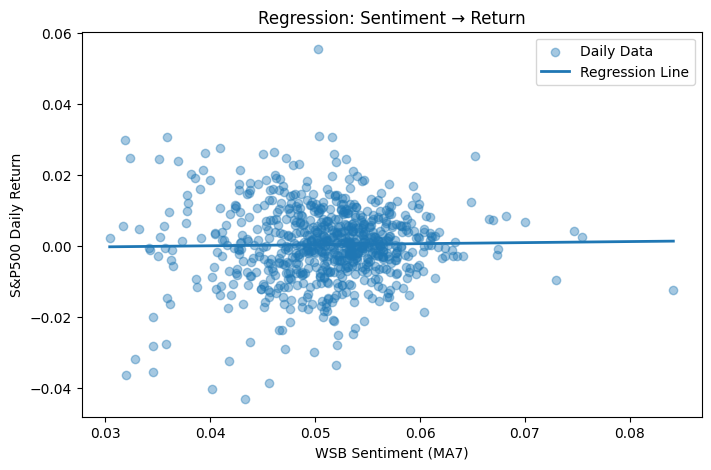

In [15]:
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df['sentiment_ma7'], df['return'], alpha=0.4, label="Daily Data")

x_vals = np.linspace(df['sentiment_ma7'].min(), df['sentiment_ma7'].max(), 100)
X_line = sm.add_constant(x_vals)
y_pred = model.predict(X_line)

plt.plot(x_vals, y_pred, linewidth=2, label="Regression Line")
plt.xlabel("WSB Sentiment (MA7)")
plt.ylabel("S&P500 Daily Return")
plt.title("Regression: Sentiment → Return")
plt.legend()
plt.show()


### Result

The statistical results show no meaningful relationship between aggregated WSB sentiment and S&P 500 daily returns. The correlation coefficient is extremely small (0.0178), indicating virtually no linear association between the two variables. Consistent with this, the regression model yields a sentiment coefficient of 0.0298 with a p-value of 0.627, which is far above conventional significance levels. The model’s R² value is essentially zero, implying that sentiment explains none of the variation in daily returns.

Overall, the findings suggest that short-term retail investor sentiment on WSB does not have predictive power for daily stock market performance and does not appear to influence broad index-level movements.




### Interpretation

Based on our analysis, we believe that WSB sentiment, at least in the way we currently measure and aggregate it, does not provide useful predictive information for daily S&P 500 returns. The extremely low correlation, insignificant regression coefficient, and near-zero R² all point toward the same conclusion: short-term retail mood on a single online forum is largely disconnected from the broad market index. At the same time, we do not interpret this as evidence that sentiment never matters. Instead, it suggests that any sentiment effect is likely more local (e.g., concentrated in specific meme stocks), more short-lived (intraday), or conditional on special market regimes rather than being a stable, linear driver of overall index performance.